#  <span style="color:red"> Excercises</span>
## Submit before the practice class of next week

Submit the task as a notebook with output after executing all solutions.

 <span style="color:red"> Only submit the exercise part of this notebook, not the whole notebook.</span>

##  <span style="color:red"> Excercise 1</span>
1. Use the NLTK book corpus (`from nltk.corpus import inaugural`) to analyze the `Inaugural Address Corpus`. Which words are frequent for all inaugural address speech over time (since 1789)? For example if we compare the two words `america` and `citizen` with the list `[4,1,1,4]` and `[3,2,2,3]` respectively, we can tell that  `citizen` is more popular as it in average occurs more often each year. Draw a diagram which shows the frequency of the top 10 words over time. `inaugural.fileids()` will list all the inaugural texts. `inaugural.raw(fileids=inaugural.fileids()[0])` will give you the raw text for the first speech. Do not use the NLTK built-in methods.
1. Improve the `getNgrams` function so that it will return also the frequencies of each n-grams in the range `1-->N` (sorted in descending order). Try to generate n-grams from 2-4 excluding unigrams (inclusive 2 and 4)?

### Example
The lazy dog jumps  123 <br>
The lazy dog 320 <br>
The lazy 589 <br>
...

1789 [('every', 9), ('government', 8), ('public', 6), ('may', 6), ('country', 5)]
1793 [('shall', 3), ('oath', 2), ('country', 1), ('endeavor', 1), ('ceremony', 1)]
1797 [('people', 20), ('government', 16), ('may', 13), ('nations', 11), ('country', 10)]
1801 [('government', 12), ('us', 10), ('may', 8), ('fellow', 7), ('citizens', 7)]
1805 [('public', 14), ('may', 10), ('citizens', 10), ('state', 8), ('fellow', 8)]
1809 [('public', 6), ('nations', 6), ('well', 5), ('country', 4), ('peace', 4)]
1813 [('war', 15), ('country', 5), ('united', 5), ('british', 5), ('every', 5)]
1817 [('government', 22), ('states', 21), ('great', 21), ('people', 15), ('us', 14)]
1821 [('great', 29), ('states', 20), ('would', 18), ('war', 16), ('united', 16)]
1825 [('union', 20), ('government', 17), ('upon', 16), ('country', 10), ('rights', 10)]
1829 [('public', 8), ('shall', 6), ('government', 6), ('power', 5), ('people', 4)]
1833 [('government', 13), ('people', 9), ('union', 9), ('states', 8), ('general', 5)]

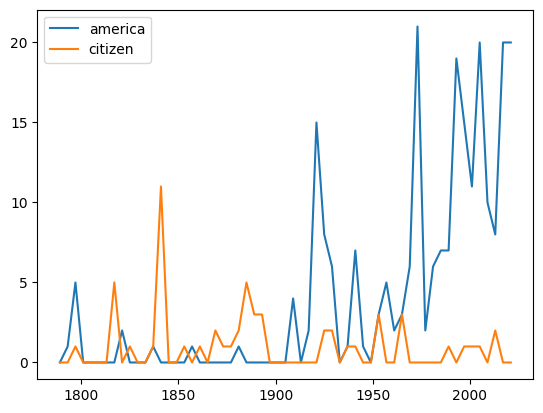

In [1]:
from nltk.corpus import inaugural

# find frequent words over time since 1789
from nltk.corpus import stopwords

for fileid in inaugural.fileids():
  words = [word.lower() for word in inaugural.words(fileid) if word.isalpha() and word.lower() not in set(stopwords.words('english'))]
  freqs = list(zip(words, [words.count(word) for word in words]))
  sorted_freqs = sorted(set(freqs), key=lambda x: x[1], reverse=True)
  print(fileid[:4], sorted_freqs[:5])

# compare the words america and citizen over time
from matplotlib import pyplot as plt
words = ['america', 'citizen']

for word in words:
  freqs = {}
  for fileid in inaugural.fileids():
    # make all lowercase
    freqs[int(fileid[:4])] = list(map(lambda x: x.lower(), inaugural.words(fileid))).count(word.lower())
  plt.plot(freqs.keys(), freqs.values(), label=word)
plt.legend()
plt.show()


# draw diagram showing the frequency of the top 10 words over time (not using nltk built ins)


In [2]:
def get_n_grams(n: int, text: str) -> list:
    words = [word for word in text.lower().split(" ") if word != ""]
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# get n grams with frequency
def get_n_gram_freq(n: int, text: str) -> dict:
    ngrams = get_n_grams(n, text)
    freqs = [ngrams.count(ngram) for ngram in ngrams]
    return dict(zip(ngrams, freqs))

# get all n grams from n->1 with frequency (sorted descending)
def get_all_n_gram_freq(n: int, text: str) -> dict:
    ngrams = {}
    for i in range(n, 1, -1):
        ngrams = {**ngrams, **get_n_gram_freq(i, text)}
    # sort
    ngrams = dict(sorted(ngrams.items(), key=lambda x: x[1], reverse=True))
    return ngrams

from nltk.corpus import inaugural
example = inaugural.raw("1789-Washington.txt")
example = example.replace("\n", " ")

get_all_n_gram_freq(4, example)

{'of the': 20,
 'to the': 12,
 'in the': 9,
 'by the': 7,
 'which the': 6,
 'on the': 6,
 'which i': 6,
 'for the': 6,
 'and the': 6,
 'of my': 5,
 'have been': 5,
 'the present': 4,
 'ought to': 4,
 'to be': 4,
 'will be': 4,
 'in which': 4,
 'the public': 4,
 'of an': 4,
 'in which i': 3,
 'with the': 3,
 'my country': 3,
 'by which': 3,
 'i have': 3,
 'under which': 3,
 'of their': 3,
 'that the': 3,
 'may be': 3,
 'i assure myself that': 2,
 'the house of': 2,
 'of which the': 2,
 'of the present': 2,
 'a retreat which': 2,
 'as well as': 2,
 'ought to be': 2,
 'all i dare': 2,
 'of my fellow': 2,
 'under which i': 2,
 'of the united': 2,
 'to the great': 2,
 'i assure myself': 2,
 'assure myself that': 2,
 'which ought to': 2,
 'and of': 2,
 'the house': 2,
 'house of': 2,
 'than that': 2,
 'of which': 2,
 'i was': 2,
 'by my': 2,
 'my country,': 2,
 'can never': 2,
 'from a': 2,
 'a retreat': 2,
 'retreat which': 2,
 'in my': 2,
 'with an': 2,
 'as the': 2,
 'as well': 2,
 'well 

## <span style="color:red"> Exercise 2</span> 

1. Count the number of tokens and types in `data/news/news.txt`. Use the `split()` method to split the text with white space
2. Count and show the words that are common between  `data/news/news.txt`  and  `data/news/news1.txt`.
3. Print the largest word (s) for each letter (a,b,c ...z) from the nltk books corpus using declarative style. Example ... `i-> incomprehensible,inextinguishable`; `t->transubstantiate`, ... Do it for any one corpus of your choice.
4. Print the most frequent starting and ending characters of words in the nltk books. Do it for any one corpus of your choice.
5. Design an algorithm to find the `statistically improbable phrases` (SIP) of a document collection. You might just come up with a `Pseudocode`. SIPs are phrases that are less probable in a `universal` collection but common to a particular topic. For example, `dependency parsing` might be a common phrase that occur in computational linguistic journals but less frequent when compared with a global science journal indexes.

In [3]:
# 1. Count the number of tokens and types in `data/news/news.txt`. Use the `split()` method to split the text with white space
with open("data/news/news.txt") as file:
    text = file.read()
    tokens = text.split()
    print("Tokens:", len(tokens))
    print("Types:", len(set(tokens)))

Tokens: 477
Types: 287


In [4]:
# 2. Count and show the words that are common between  `data/news/news.txt`  and  `data/news/news1.txt`.
with open("data/news/news.txt") as file:
  text = file.read()
  tokens = set(text.split())
  with open("data/news/news1.txt") as file:
      text = file.read()
      tokens1 = set(text.split())
      common = tokens.intersection(tokens1)
      print(common)

{'A', 'of', 'the', 'that', 'it', 'as', 'said', 'figures', 'may', 'from', 'others', 'is', 'before', 'women', 'prior', 'if', '12', 'says', 'for', 'years', 'been', 'political', 'That', 'are', 'former', 'his', 'any', 'However,', 'on', 'see', 'which', 'The', 'could', 'World', 'he', 'who', 'live', 'will', 'have', 'by', 'was', 'while', 'term', 'preferred', 'at', '"The', 'outside', 'with', 'also', 'and', 'be', 'its', 'in', 'has', 'still', 'being', 'this', 'senior', 'make', 'a', 'under', 'to', 'but'}


In [5]:
# 3. Print the largest word (s) for each letter (a,b,c ...z) from the nltk books corpus using declarative style. Example ... `i-> incomprehensible,inextinguishable`; `t->transubstantiate`, ... Do it for any one corpus of your choice.
import string

def get_longest_words(letter: str, text: str) -> list:
  words = [word for word in text if word.lower().startswith(letter)]
  maxlen = max(len(word) for word in words)
  return [word for word in words if len(word) == maxlen]

from nltk.book import text1
text = text1.tokens
for letter in string.ascii_lowercase:
  words = get_longest_words(letter, text)
  if words:
    print(f"{letter}->{','.join(words)}")

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
a->apprehensiveness,apprehensiveness,apprehensiveness,apprehensiveness
b->Bibliographical
c->characteristically
d->dissatisfaction,disembowelments
e->Ehrenbreitstein
f->fortifications
g->grotesqueness,gentlemanlike,grandiloquent,gentlemanlike
h->hermaphroditical
i->indispensableness
j->judgmatically,justification,jurisprudence
k->Krusensterns
l->lexicographer
m->multitudinously,multitudinously,Mephistophelean,miscellaneously
n->notwithstanding,notwithstanding,notwithstanding,notwi

In [6]:
# 4. Print the most frequent starting and ending characters of words in the nltk books. Do it for any one corpus of your choice.
def sorted_freq_dict(tokens: list[str]) -> dict:
  freq = {}
  for word in tokens:
    if word:
      if word[0] in freq:
        freq[word[0]] += 1
      else:
        freq[word[0]] = 1
      if word[-1] in freq:
        freq[word[-1]] += 1
      else:
        freq[word[-1]] = 1
  return dict(sorted(freq.items(), key=lambda x: x[1], reverse=True))

def get_start_end_chars(text: str) -> tuple:
  most_frequent_start = list(sorted_freq_dict([word[0] for word in text]).items())[0]
  most_frequent_end = list(sorted_freq_dict([word[-1] for word in text]).items())[0]
  return most_frequent_start, most_frequent_end

from nltk.book import text1
text = text1.tokens
start_freq, end_freq = get_start_end_chars(text)
print("Start freq:", start_freq)
print("End freq:", end_freq)

Start freq: ('t', 67734)
End freq: ('e', 84734)


In [7]:
# 5. Design an algorithm to find the `statistically improbable phrases` (SIP) of a document collection. You might just come up with a `Pseudocode`. SIPs are phrases that are less probable in a `universal` collection but common to a particular topic. For example, `dependency parsing` might be a common phrase that occur in computational linguistic journals but less frequent when compared with a global science journal indexes.

# Pseudocode
# 1. Get the document collection
# 2. Tokenize the documents
# 3. Get the frequency of each token
# 4. Calculate the probability of each token
# 5. Calculate the probability of each phrase
# 6. Compare the probability of each phrase with a universal collection
# 7. Return the phrases that are less probable in the universal collection but common in the particular topic

## SUBMISSION DETAILS:
## Leopold Lemmermann